<div>
    <div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" id="partie0">
        <h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">
            Projet  6
        </h1>
    </div>
</div>    

<div>
    <div style="border-style: double;border-width: 5px;border-color: RGB(51,165,182);" >
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonctions </li><br>
                <li><a href="#partie2">Partie 2</a> : Importer les fichiers et analyses</li><br>
           </lu>
            <br>
        </div>
    </div>
</div>

<div>
    <div style="background-color: RGB(51,165,182);" id="partie1">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie1.1" >
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">
            1.1 - Importation les librairies
        </h3>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>
    

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [42]:
sns.set( 
    style='whitegrid',
    context='notebook',
    palette=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45'],
    rc={'figure.figsize':(14,6),'axes.facecolor':'grey', 'figure.facecolor':'grey'})

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie1.2" >
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">
            1.2 - Fonctions
        </h3>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>
    

In [43]:
def lorenz_gini(df,period):
    new= df
    new=new[new["Year"] == period]   
    new=new[["client_id","price"]]
    new= new.groupby(["client_id"]).sum()
    new.sort_values("client_id",axis=0,inplace=True)
    price=new["price"]
    n = len(price)
    lorenz = np.cumsum(np.sort(price))/price.sum()
    lorenz=np.append([0],lorenz)
    plt.figure(figsize=(14,6))

    sns.scatterplot(np.linspace(0,1,len(lorenz)),lorenz,label="CA per client")
    plt.plot([0,1],[0,1],color="orange",label="Bissectrice")
    plt.legend(facecolor='w')

    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
    S = 0.5 - AUC
    gini = 2*S
    print("Le coefficient Gini pour est de : ", round(gini,2),"pour la periode ",period,".")    
    print("Courbe Lorenz : ")

<br>
<div>
    <div style="background-color: RGB(51,165,182);" id="partie2">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - : Importer les fichiers et analyses
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>


<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie2.1">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            2.1 - Importation des csv
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
<!--                 <li></li> -->
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [44]:
t_b2b= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2b.csv',index_col='date',parse_dates=True)
t_b2c= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2c.csv',index_col='date',parse_dates=True)
global_t= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t.csv',index_col='date',parse_dates=True)
global_t_client= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t_client.csv')

In [45]:
global_t.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ  
date                                           
2021-03-22 01:40:22.782925           L    1.0  
2023-02-22 01:40:22.782925           L    1.0

In [46]:
global_t['categ'] = global_t['categ'].astype(int)

In [47]:
global_t['weekday']=global_t['weekday'].replace([0,1,2,3,4,5,6],['monday', 'tuesday', 'wednesday','thursday','friday','saturday','sunday'])
global_t['Month-Year'] = pd.to_datetime(global_t.index,format='%Y%m')
global_t['Month-Year']=global_t['Month-Year'].dt.strftime('%m/%Y')
global_t['Day_M_Y'] = pd.to_datetime(global_t.index,format='%d%m%Y')

global_t['Day_M_Y']=global_t['Day_M_Y'].dt.strftime('%d/%m/%Y')
global_t['Year'] = global_t.index.year
global_t.head(2)

session_id  month  month_part    weekday  hour  \
date                                                                        
2021-03-22 01:40:22.782925     s_9707      3           2     monday     1   
2023-02-22 01:40:22.782925   s_345108      2           2  wednesday     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ Month-Year     Day_M_Y  Year  
date                                                                        
2021-03-22 01:40:22.782925           L      1    03/2021  22/03/2021  2021  
2023-02-22 01:40:22.782925           L      1    02/2023  22/02/2023  2023

In [48]:
global_t.nunique()

session_id     342315
month              12
month_part          4
weekday             7
hour               24
client_id        8600
sex                 2
age                76
age_group           4
product_id       3266
price            1443
price_group         5
categ               3
Month-Year         24
Day_M_Y           730
Year                3
dtype: int64

In [49]:
t_b2c['Month-Year'] = pd.to_datetime(t_b2c.index,format='%Y%m')
t_b2c['Month-Year']=t_b2c['Month-Year'].dt.strftime('%m/%Y')
t_b2c['Day_M_Y'] = pd.to_datetime(t_b2c.index,format='%d%m%Y')

t_b2c['Day_M_Y']=t_b2c['Day_M_Y'].dt.strftime('%d/%m/%Y')
t_b2c['Year'] = t_b2c.index.year
t_b2c.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ Month-Year     Day_M_Y  Year  
date                                                                        
2021-03-22 01:40:22.782925           L    1.0    03/2021  22/03/2021  2021  
2023-02-22 01:40:22.782925           L    1.0    02/2023  22/02/2023  2023

In [50]:
df_age_groupe = global_t[['age_group','price']]
df_age_groupe.groupby(['age_group']).sum()

price
age_group              
- 30       3.294902e+06
31-50      5.538636e+06
51-70      2.506488e+06
71+        5.160535e+05

In [51]:
t_b2b['Month-Year'] = pd.to_datetime(t_b2b.index,format='%Y%m')
t_b2b['Month-Year']=t_b2b['Month-Year'].dt.strftime('%m/%Y')
t_b2b['Day_M_Y'] = pd.to_datetime(t_b2b.index,format='%d%m%Y')

t_b2b['Day_M_Y']=t_b2b['Day_M_Y'].dt.strftime('%d/%m/%Y')
t_b2b['Year'] = t_b2b.index.year
t_b2b.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2022-10-17 18:53:48.958205   s_283920     10           1        0    18   
2022-08-17 18:53:48.958205   s_254678      8           1        2    18   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2022-10-17 18:53:48.958205    c_4958   m  23.0      - 30      1_587   4.99   
2022-08-17 18:53:48.958205    c_4958   m  23.0      - 30      1_587   4.99   

                           price_group  categ Month-Year     Day_M_Y  Year  
date                                                                        
2022-10-17 18:53:48.958205           S    1.0    10/2022  17/10/2022  2022  
2022-08-17 18:53:48.958205           S    1.0    08/2022  17/08/2022  2022

In [52]:
t_b2b.describe().T

count         mean        std      min      25%      50%  \
month       46643.0     6.538666   3.481576     1.00     4.00     6.00   
month_part  46643.0     1.357739   1.029961     0.00     0.00     1.00   
weekday     46643.0     2.976803   1.994756     0.00     1.00     3.00   
hour        46643.0    11.501319   6.880638     0.00     5.00    12.00   
age         46643.0    43.844693   9.096125    23.00    42.00    42.00   
price       46643.0    18.890858  21.177524     0.62     8.99    13.99   
categ       46643.0     0.473619   0.636536     0.00     0.00     0.00   
Year        46643.0  2021.666702   0.616834  2021.00  2021.00  2022.00   

                75%     max  
month         10.00    12.0  
month_part     2.00     3.0  
weekday        5.00     6.0  
hour          17.00    23.0  
age           53.00    54.0  
price         19.53   300.0  
categ          1.00     2.0  
Year        2022.00  2023.0

In [53]:
t_b2c.describe().T

count         mean        std      min      25%      50%  \
month       632689.0     6.501825   3.480642     1.00     3.00     6.00   
month_part  632689.0     1.367860   1.042610     0.00     0.00     1.00   
weekday     632689.0     2.989372   2.003522     0.00     1.00     3.00   
hour        632689.0    11.521670   6.920055     0.00     6.00    12.00   
age         632689.0    44.214233  13.847172    18.00    35.00    43.00   
price       632689.0    17.346522  18.093967     0.62     8.82    13.99   
categ       632689.0     0.439464   0.591753     0.00     0.00     0.00   
Year        632689.0  2021.670783   0.617606  2021.00  2021.00  2022.00   

                75%     max  
month          9.00    12.0  
month_part     2.00     3.0  
weekday        5.00     6.0  
hour          18.00    23.0  
age           51.00    93.0  
price         18.99   300.0  
categ          1.00     2.0  
Year        2022.00  2023.0

### Moyenne mobile

In [54]:
global_t.sort_index()

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-01 00:01:07.843138        s_1      3           0   monday     0   
2021-03-01 00:02:26.047414        s_2      3           0   monday     0   
2021-03-01 00:02:38.311413        s_3      3           0   monday     0   
2021-03-01 00:04:54.559692        s_4      3           0   monday     0   
2021-03-01 00:05:18.801198        s_5      3           0   monday     0   
...                               ...    ...         ...      ...   ...   
2023-02-28 23:49:03.148402   s_348444      2           3  tuesday    23   
2023-02-28 23:51:29.318531   s_348445      2           3  tuesday    23   
2023-02-28 23:53:18.929676   s_348446      2           3  tuesday    23   
2023-02-28 23:58:00.107815   s_348447      2           3  tuesday    23   
2023-02-28 23:58:30.792755   s_348435      2           3  tuesday    23   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-01 00:01:07.843138     c_329   f  55.0     51-70     0_1259  11.99   
2021-03-01 00:02:26.047414     c_664   m  62.0     51-70     0_1390  19.37   
2021-03-01 00:02:38.311413     c_580   m  34.0     31-50     0_1352   4.50   
2021-03-01 00:04:54.559692    c_7912   f  33.0     31-50     0_1458   6.55   
2021-03-01 00:05:18.801198    c_2033   f  66.0     51-70     0_1358  16.49   
...                              ...  ..   ...       ...        ...    ...   
2023-02-28 23:49:03.148402    c_3573   f  26.0      - 30      1_508  21.92   
2023-02-28 23:51:29.318531      c_50   f  28.0      - 30       2_37  48.99   
2023-02-28 23:53:18.929676     c_488   f  37.0     31-50      1_695  26.99   
2023-02-28 23:58:00.107815    c_4848   m  69.0     51-70     0_1547   8.99   
2023-02-28 23:58:30.792755    c_3575   f  41.0     31-50     0_1398   4.52   

                           price_group  categ Month-Year     Day_M_Y  Year  
date                                                                        
2021-03-01 00:01:07.843138           M      0    03/2021  01/03/2021  2021  
2021-03-01 00:02:26.047414           M      0    03/2021  01/03/2021  2021  
2021-03-01 00:02:38.311413           S      0    03/2021  01/03/2021  2021  
2021-03-01 00:04:54.559692           S      0    03/2021  01/03/2021  2021  
2021-03-01 00:05:18.801198           M      0    03/2021  01/03/2021  2021  
...                                ...    ...        ...         ...   ...  
2023-02-28 23:49:03.148402           L      1    02/2023  28/02/2023  2023  
2023-02-28 23:51:29.318531           L      2    02/2023  28/02/2023  2023  
2023-02-28 23:53:18.929676           L      1    02/2023  28/02/2023  2023  
2023-02-28 23:58:00.107815           S      0    02/2023  28/02/2023  2023  
2023-02-28 23:58:30.792755           S      0    02/2023  28/02/2023  2023  

[679332 rows x 16 columns]

In [55]:
freq_daily = global_t.groupby(['Day_M_Y']).agg({'session_id':'count'}).rename(
        columns={'session_id': 'Frequence'})

freq_daily.reset_index(inplace=True)
freq_daily['Day_M_Y'] = pd.to_datetime(freq_daily['Day_M_Y'])
freq_daily=freq_daily.sort_values(by="Day_M_Y")
freq_daily.head(2)

Day_M_Y  Frequence
4 2021-01-03        963
6 2021-01-04        916

### Courbe Lorenz par periode ###

In [56]:
global_t.head(2)

session_id  month  month_part    weekday  hour  \
date                                                                        
2021-03-22 01:40:22.782925     s_9707      3           2     monday     1   
2023-02-22 01:40:22.782925   s_345108      2           2  wednesday     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ Month-Year     Day_M_Y  Year  
date                                                                        
2021-03-22 01:40:22.782925           L      1    03/2021  22/03/2021  2021  
2023-02-22 01:40:22.782925           L      1    02/2023  22/02/2023  2023

Le coefficient Gini pour est de :  0.4 pour la periode  2021 .
Courbe Lorenz : 
Le coefficient Gini pour est de :  0.42 pour la periode  2022 .
Courbe Lorenz : 
Le coefficient Gini pour est de :  0.45 pour la periode  2023 .
Courbe Lorenz : 


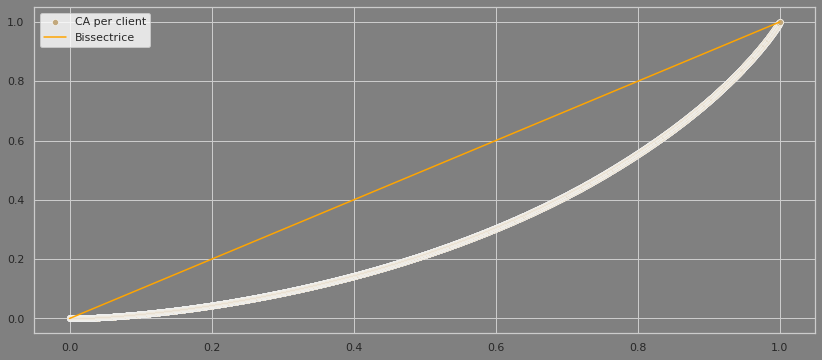

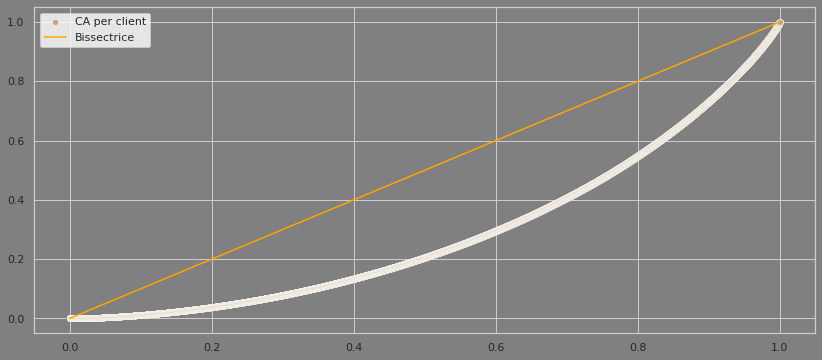

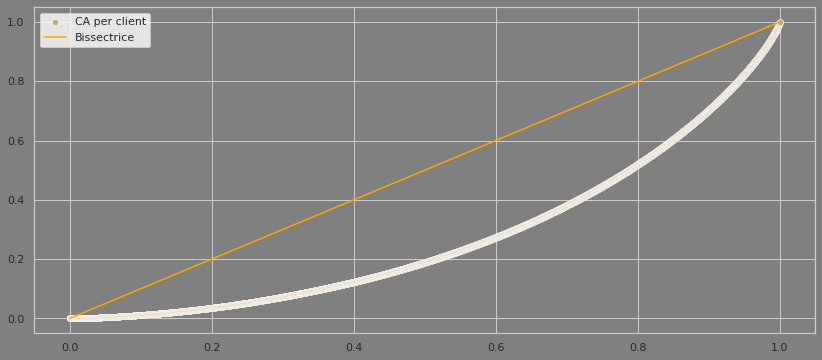

In [57]:
# plt.subplot(2,2,1)
lorenz_gini(t_b2c,2021)
# plt.subplot(2,2,2)
lorenz_gini(t_b2c,2022)
# plt.subplot(2,2,3)
lorenz_gini(t_b2c,2023)

Le coefficient Gini pour est de :  0.45 pour la periode  2021 .
Courbe Lorenz : 
Le coefficient Gini pour est de :  0.46 pour la periode  2022 .
Courbe Lorenz : 
Le coefficient Gini pour est de :  0.49 pour la periode  2023 .
Courbe Lorenz : 


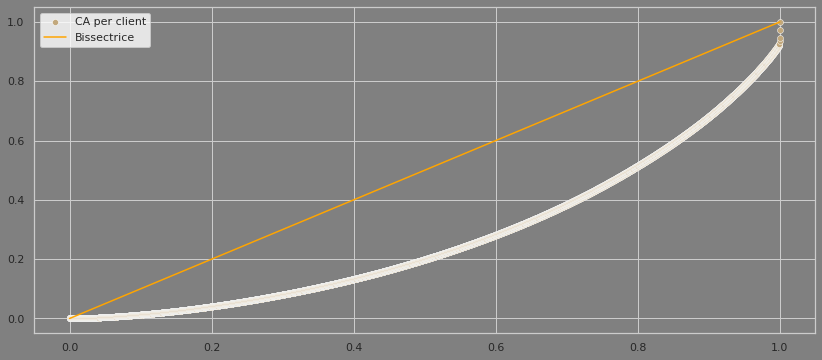

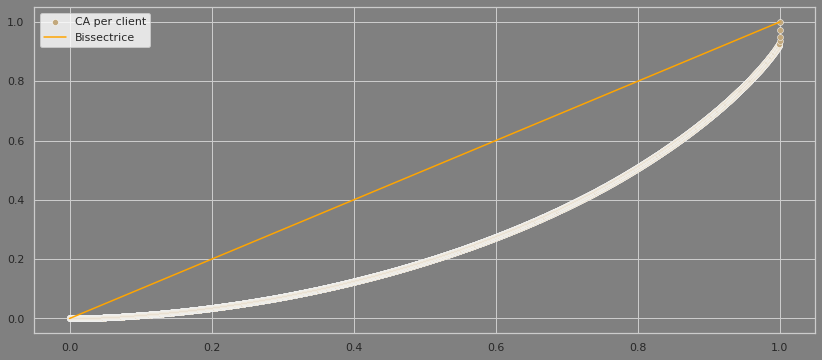

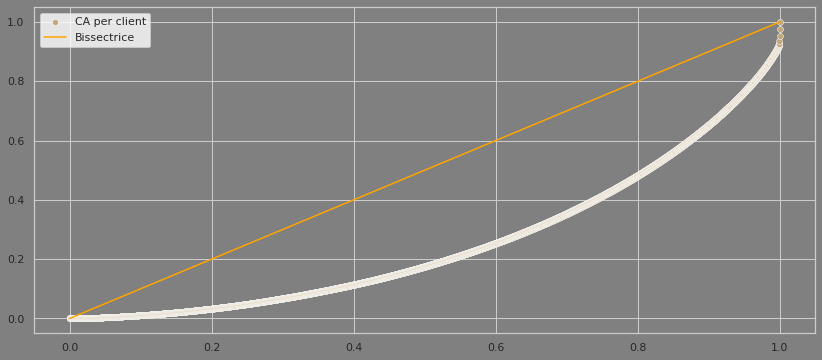

In [58]:
# plt.subplot(2,2,1)
lorenz_gini(global_t,2021)
# plt.subplot(2,2,2)
lorenz_gini(global_t,2022)
# plt.subplot(2,2,3)
lorenz_gini(global_t,2023)

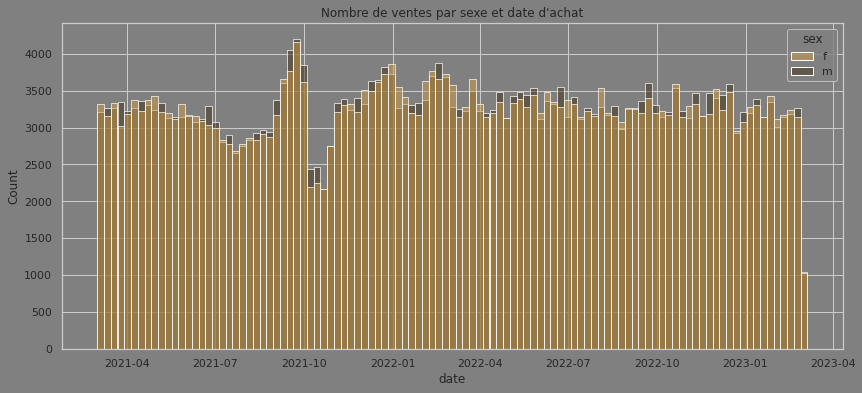

In [59]:
plt.figure(figsize=(14,6))
sns.histplot(data=global_t, x='date', hue='sex', binwidth=7,palette=['#CC9B45','#423217'])
plt.title('Nombre de ventes par sexe et date d\'achat')
plt.savefig('# ventes par sexe et date.png', dpi=300, bbox_inches='tight')
plt.show()

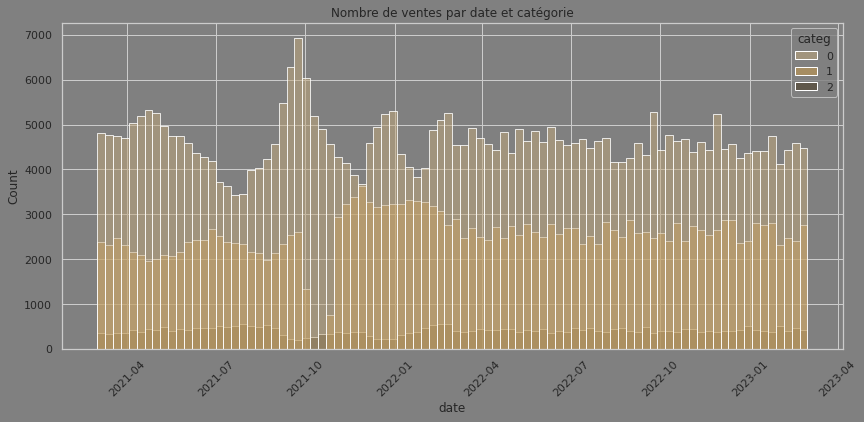

In [60]:
plt.figure(figsize=(14,6))
sns.histplot(data=global_t, x='date', hue='categ',palette=['#c2a87c','#CC9B45','#423217'])
plt.xticks(rotation=45)
plt.title('Nombre de ventes par date et catégorie')
plt.savefig('histogramme_date-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1440x864 with 0 Axes>

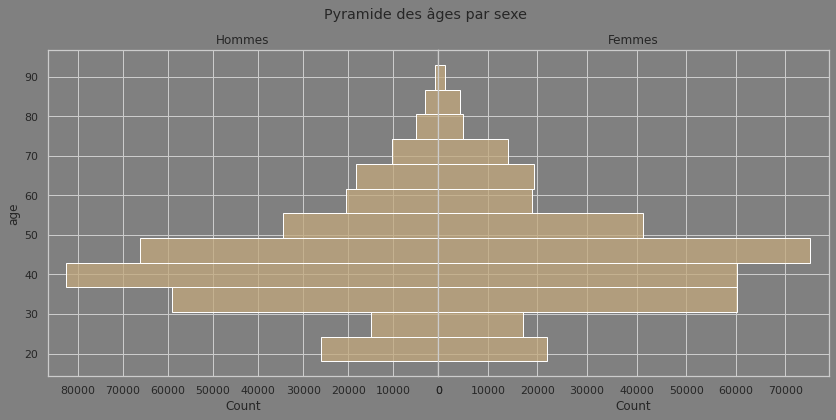

In [61]:
plt.figure(figsize=(20,12))

fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

sns.histplot(ax=axes[0], y=global_t[global_t['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=global_t[global_t['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('pyramide_ages.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1008x432 with 0 Axes>

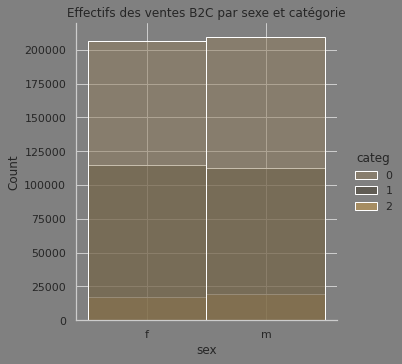

In [62]:
plt.figure(figsize=(14,6))
sns.displot(data=global_t, x='sex', hue='categ',palette=['#8F7C5B','#423A2A','#CC9B45'])
plt.title('Effectifs des ventes B2C par sexe et catégorie')
plt.savefig('Effectifs des ventes B2C par sexe et catégorie.png', dpi=300, bbox_inches='tight')

plt.show()

In [63]:
t_b2c=t_b2c.merge(t_b2c.pivot_table(
        index=['client_id', 'date'], 
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}),on='client_id', how='left').round(2)

In [64]:
global_t['mean'] = global_t['price'].rolling(window=3, closed='left').mean()
global_t.head(2)

session_id  month  month_part    weekday  hour  \
date                                                                        
2021-03-22 01:40:22.782925     s_9707      3           2     monday     1   
2023-02-22 01:40:22.782925   s_345108      2           2  wednesday     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ Month-Year     Day_M_Y  Year  \
date                                                                         
2021-03-22 01:40:22.782925           L      1    03/2021  22/03/2021  2021   
2023-02-22 01:40:22.782925           L      1    02/2023  22/02/2023  2023   

                            mean  
date                              
2021-03-22 01:40:22.782925   NaN  
2023-02-22 01:40:22.782925   NaN

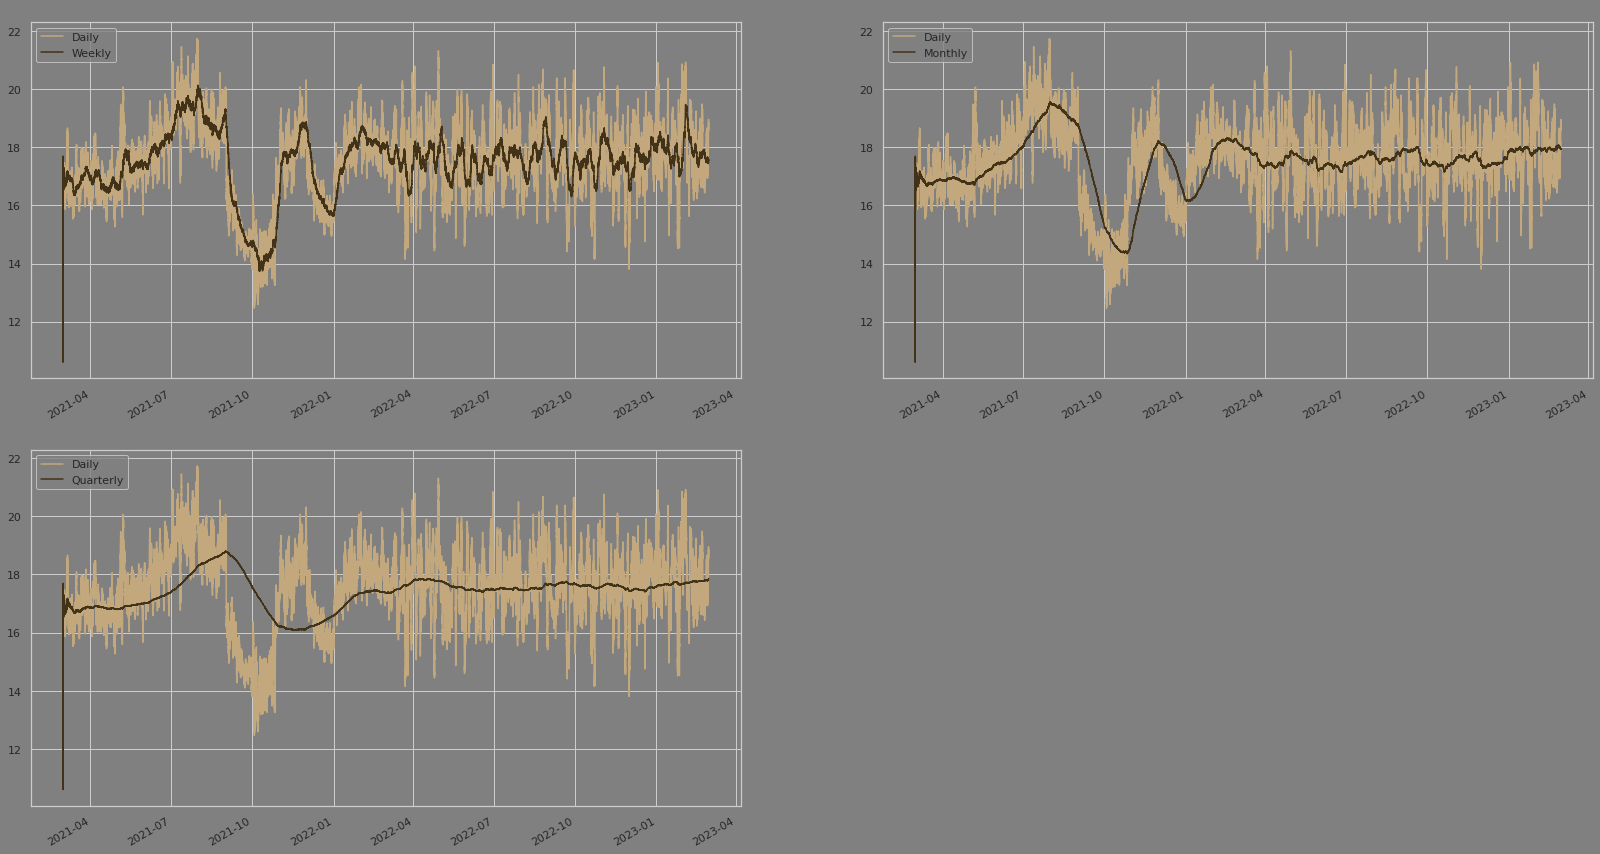

In [65]:
x=global_t.sort_index()
plt.figure(figsize=(28,16))
plt.subplot(2,2,3)
Y4 = x["2021":"2023"]["price"].rolling("1d").mean().plot( label='Daily') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend
Y1 = x["2021":"2023"]["price"].rolling("90d").mean().plot( label='Quarterly') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend

plt.subplot(2,2,2)
Y4 = x["2021":"2023"]["price"].rolling("1d").mean().plot( label='Daily') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend
Y2 = x["2021":"2023"]["price"].rolling("30d").mean().plot( label='Monthly') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend

plt.subplot(2,2,1)
Y4 = x["2021":"2023"]["price"].rolling("1d").mean().plot( label='Daily') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend
Y3 = x["2021":"2023"]["price"].rolling("7d").mean().plot( label='Weekly') # deuxieme courbe
# Extra information
plt.title(' ') # titre
plt.xlabel('') # axes
plt.ylabel('') # axes
plt.legend() # legend
plt.savefig('Moyennes mobiles', dpi=300, bbox_inches='tight')

plt.show()


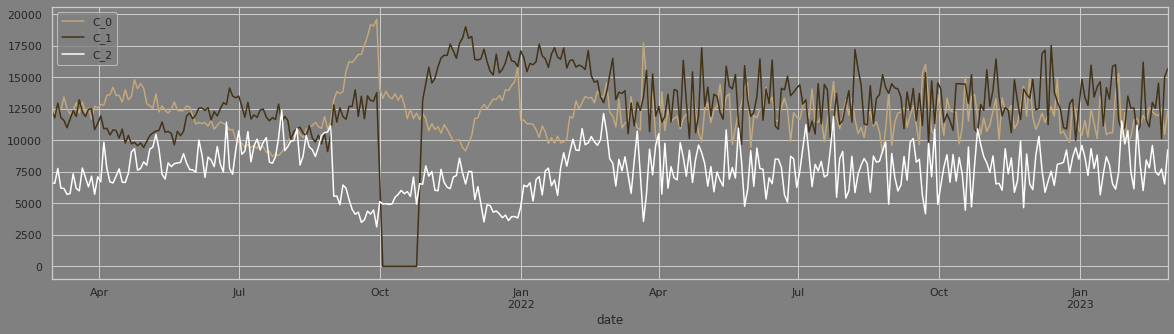

In [66]:
c_0 =global_t[global_t['categ']==0]
c_1 =global_t[global_t['categ']==1]
c_2 =global_t[global_t['categ']==2]

plt.figure(figsize=(20,5))
c_0["2021":"2023"]["price"].resample("2d").sum().plot()
c_1["2021":"2023"]["price"].resample("2d").sum().plot()
c_2["2021":"2023"]["price"].resample("2d").sum().plot(color='White')
plt.legend(labels=['C_0','C_1','C_2'])
plt.savefig('Resample', dpi=300, bbox_inches='tight')
plt.show()


In [67]:
business =['c_1609','c_6714','c_3454','c_4958']
global_t_b2c=global_t[~global_t['client_id'].isin(business)]

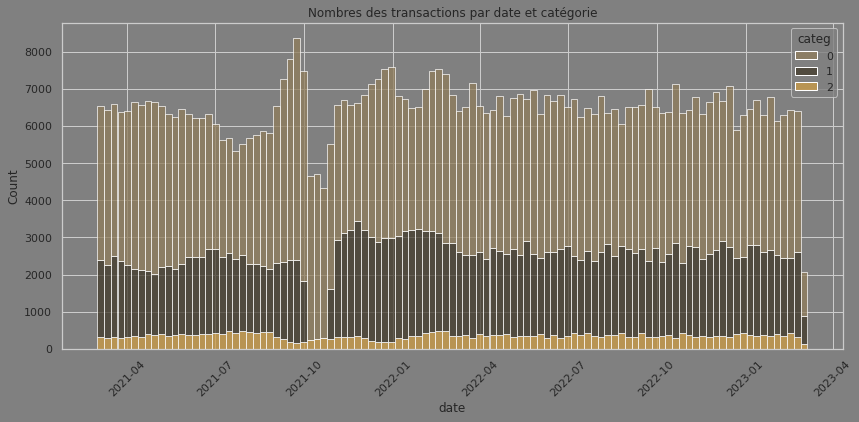

In [68]:
plt.figure(figsize=(14,6))
sns.histplot(data=global_t, x='date', hue='categ', multiple='stack', binwidth=7,palette=['#8F7C5B','#423A2A','#CC9B45'])
plt.xticks(rotation=45)
plt.title('Nombres des transactions par date et catégorie')
# plt.savefig(url_fig + 'histogramme_date_categorie.png', dpi=300, bbox_inches='tight')
plt.show()

Catégorie 0


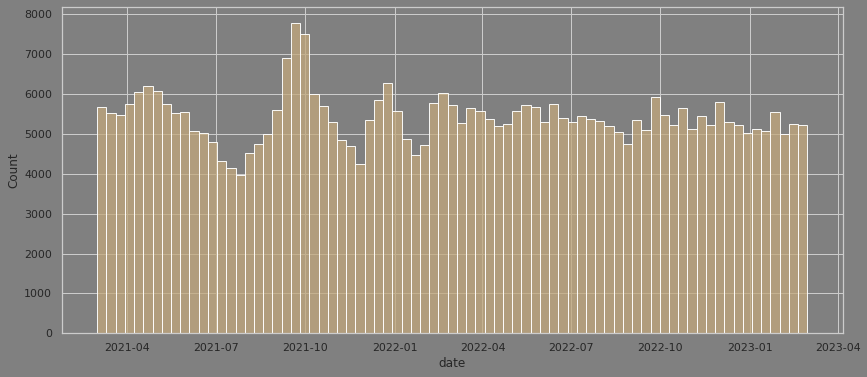

Catégorie 1


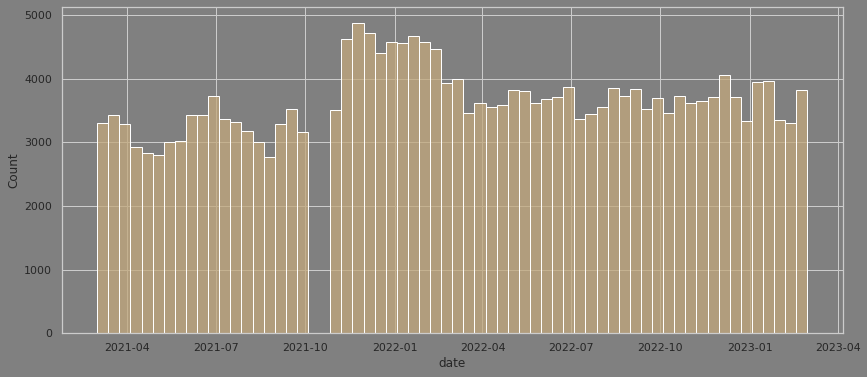

Catégorie 2


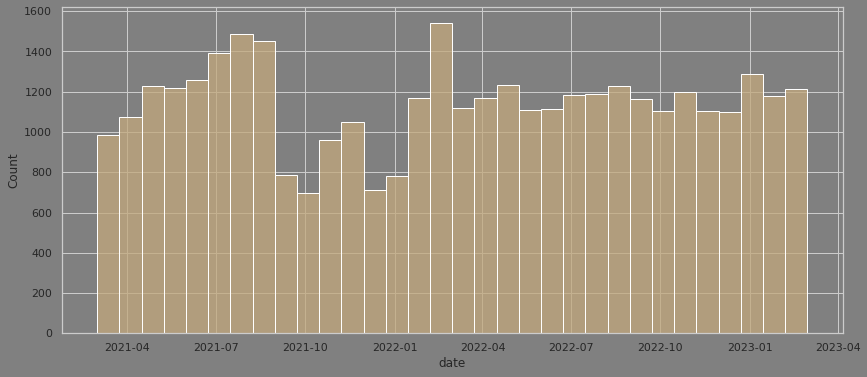

In [69]:
for i in sorted(global_t['categ'].unique()):
    print('Catégorie', i)
    plt.figure(figsize=(14,6))

    sns.histplot(data=global_t[global_t['categ']==i], x='date')
    plt.show()

### Focus Octobre ###



In [70]:
octobre = global_t[(global_t['Month-Year']=='10/2021')]
octobre['day'] = octobre.index.day
octobre = octobre.groupby([octobre.day, 'categ']).agg({'price':['sum', 'count']}).reset_index()
octobre.columns = ['day','categ', 'ca', 'volume']
octobre.head(2)

day  categ       ca  volume
0    1      0  6950.50     663
1    1      1  7003.79     344

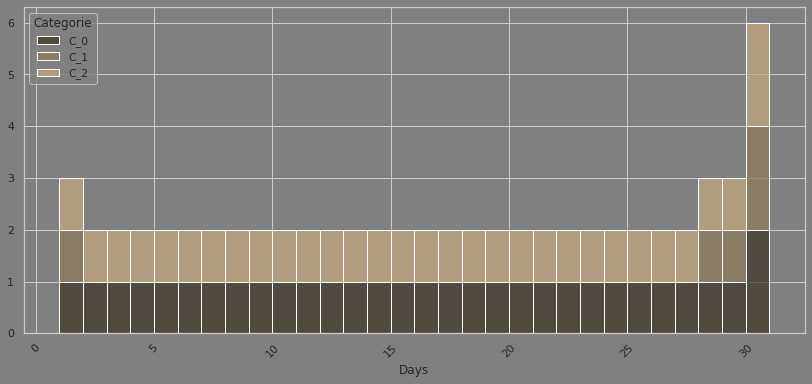

In [71]:
plt.figure(figsize=(14,6))
sns.histplot(data=octobre, x='day', hue='categ', multiple='stack', binwidth=1,palette=['#c2a87c','#8F7C5B','#423A2A'])
plt.xticks(rotation=45)
plt.title('')
plt.xlabel('Days') # axes
plt.ylabel('') # axes
plt.savefig('Focus Octobre 21', dpi=300, bbox_inches='tight')
plt.legend(title='Categorie',labels=['C_0','C_1','C_2'])


plt.show()
